In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
import math
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

df = pd.read_csv (r'diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


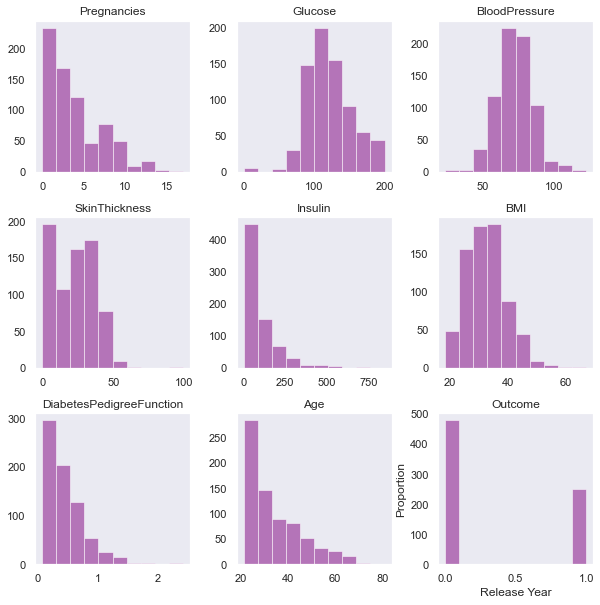

In [166]:
df.hist(color='purple',
        alpha=0.5,
        stacked=False,
        figsize=(10, 10),
        grid=False)

plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

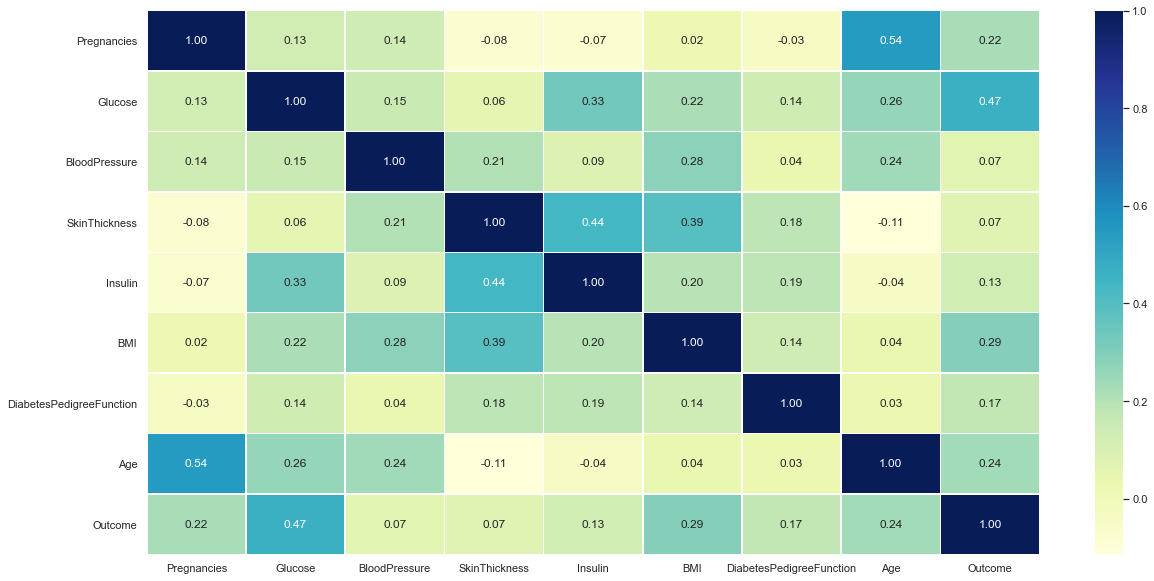

In [130]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

In [131]:
#Removing people with BMI 0 and BloodPressure 0
df = df[df.BMI>0]
df = df[df.BloodPressure>0]

In [132]:
di = {20:[0,0],25:[0,0],30:[0,0],35:[0,0],40:[0,0],45:[0,0],50:[0,0],55:[0,0],60:[0,0],65:[0,0],70:[0,0],75:[0,0],80:[0,0]}

keys = ['20-24','25-29','30-34','35-49','40-44','44-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']

for index, row in df.iterrows():
    for k in di.keys():
        if row.Age in range(k,k+5):
            if row.Outcome:
                di[k][1]+=1

            else:
               di[k][0]+=1

d0 = [v[0] for v in di.values()]
d1= [v[1] for v in di.values()]


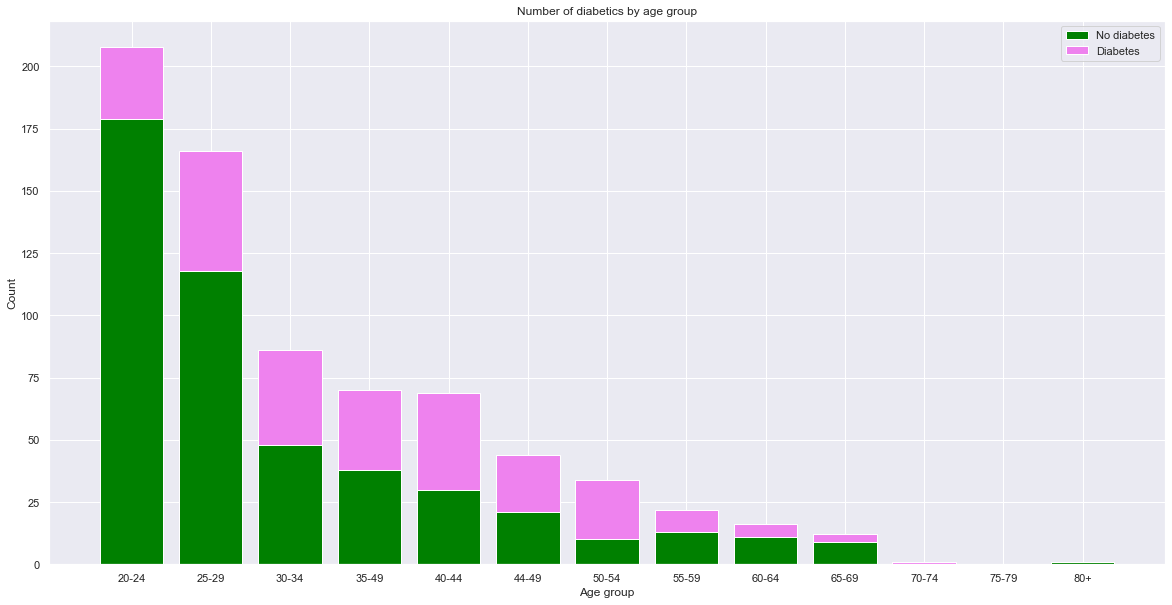

In [133]:
fig, ax = plt.subplots()

ax.bar(keys, d0,label='No diabetes', width=0.8, color='green')
ax.bar(keys, d1,label='Diabetes', width=0.8, color='violet', bottom=d0)

ax.set_ylabel('Count')
ax.set_xlabel('Age group')
ax.set_title('Number of diabetics by age group')
ax.legend()

plt.show()

In [134]:

keys = [i*5+15 for i in range(11)]
d0 = [0 for i in range(len(keys))]
d1= [0 for i in range(len(keys))]


for index, row in df.iterrows():
    for k in range(len(keys)):
        if round(row.BMI) in range(keys[k],keys[k]+5):
            if row.Outcome:
                d1[k]+=1 
            else:
               d0[k]+=1



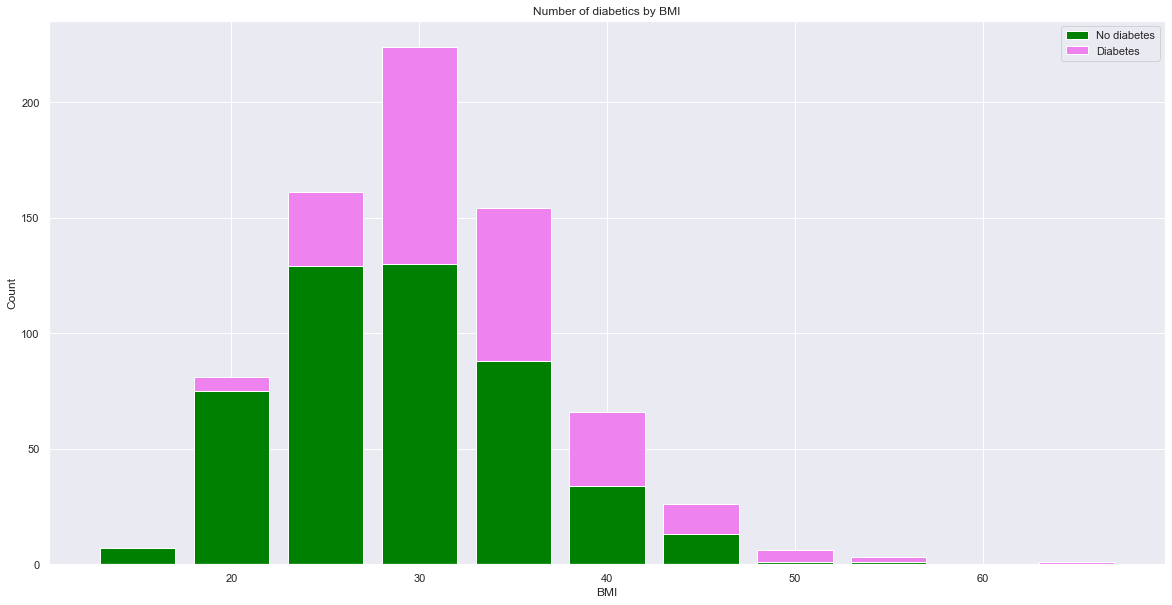

In [135]:
fig, ax = plt.subplots()

ax.bar(keys, d0,label='No diabetes', width=4, color='green')
ax.bar(keys, d1,label='Diabetes', width=4, color='violet', bottom=d0)

ax.set_ylabel('Count')
ax.set_xlabel('BMI')
ax.set_title('Number of diabetics by BMI')
ax.legend()

plt.show()

In [136]:
keys = [i*20 for i in range(10)]
d0 = [0 for i in range(len(keys))]
d1= [0 for i in range(len(keys))]


for index, row in df.iterrows():
    for k in range(len(keys)):
        if row.Glucose in range(keys[k],keys[k]+20):
            if row.Outcome:
                d1[k]+=1
            else:
               d0[k]+=1

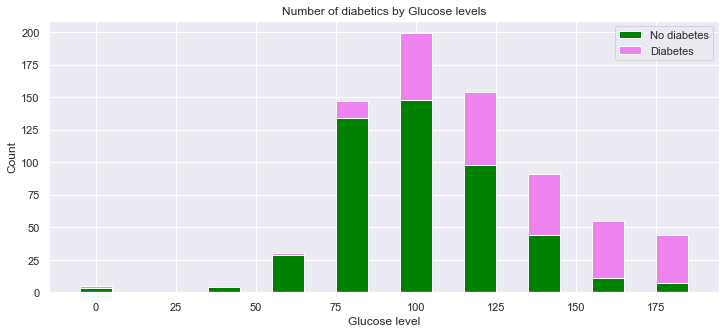

In [137]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(keys, d0,label='No diabetes', width=10, color='green')
ax.bar(keys, d1,label='Diabetes', width=10, color='violet', bottom=d0)
ax.set_ylabel('Count')
ax.set_xlabel('Glucose level')
ax.set_title('Number of diabetics by Glucose levels')
ax.legend()

plt.show()

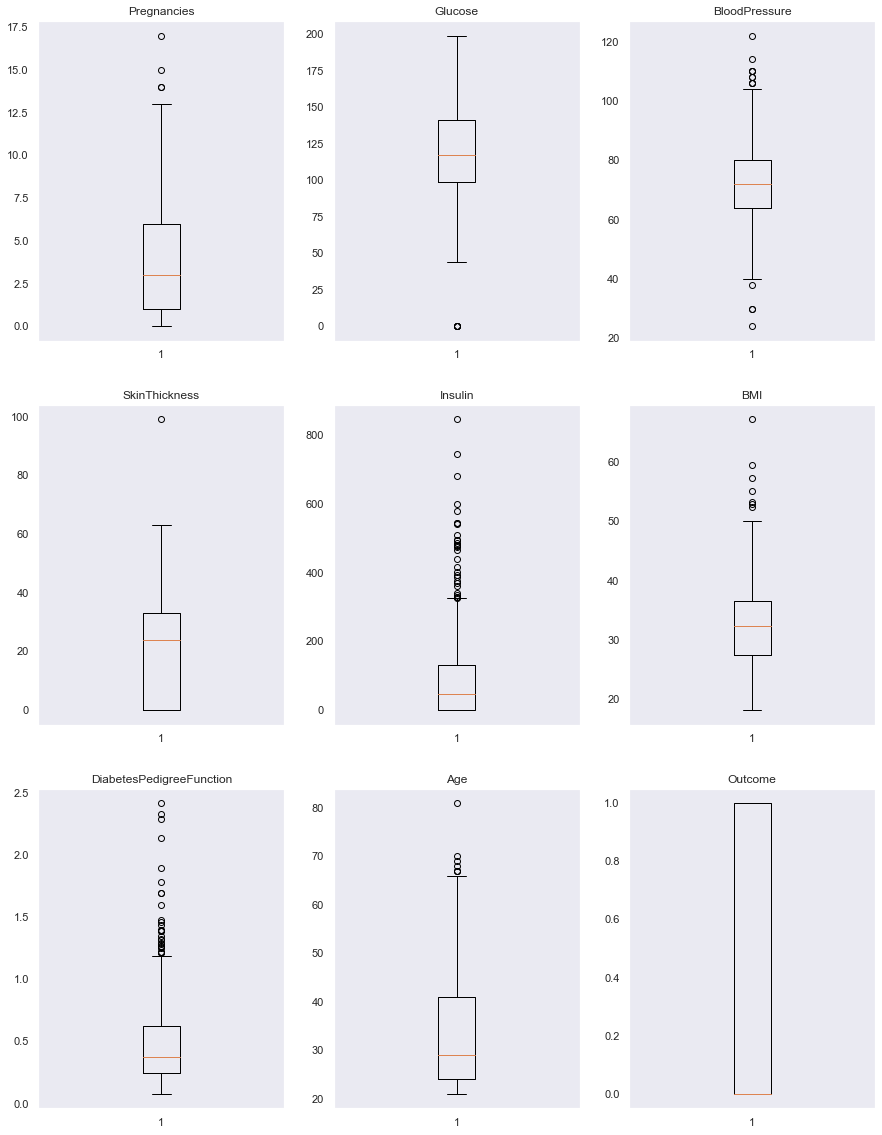

In [138]:
fig = plt.figure(figsize=(15, 20))

# print(df.columns[0])
for index in range(len(df.columns)):
    fig.add_subplot(3,3,index+1)
    plt.boxplot(df[df.columns[index]].values)
    plt.title(df.columns[index])
    plt.grid(False)
  

In [139]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled)

df_scaled

,0,1,2,3,4,5,6,7,8
0,0.638207,0.836202,-0.029726,0.860048,-0.719195,0.164241,0.461296,1.420327,1.379994
1,-0.852033,-1.118312,-0.514874,0.477824,-0.719195,-0.853145,-0.371481,-0.197381,-0.724641
2,1.234303,1.922043,-0.676590,-1.369593,-0.719195,-1.332770,0.597075,-0.112239,1.379994
3,-0.852033,-0.994216,-0.514874,0.095600,0.086131,-0.635134,-0.926665,-1.048806,-0.724641
4,-1.150081,0.494937,-2.617184,0.860048,0.720112,1.544980,5.473043,-0.027096,1.379994
...,...,...,...,...,...,...,...,...,...
724,1.830399,-0.621927,0.293707,1.688200,0.822919,0.062503,-0.914596,2.527179,-0.724641
725,-0.553985,0.029577,-0.191442,0.350416,-0.719195,0.629332,-0.404671,-0.537951,-0.724641
726,0.340159,-0.001447,-0.029726,0.095600,0.240343,-0.911282,-0.691315,-0.282524,-0.724641
727,-0.852033,0.153673,-1.000023,-1.369593,-0.719195,-0.344452,-0.377515,1.164899,1.379994


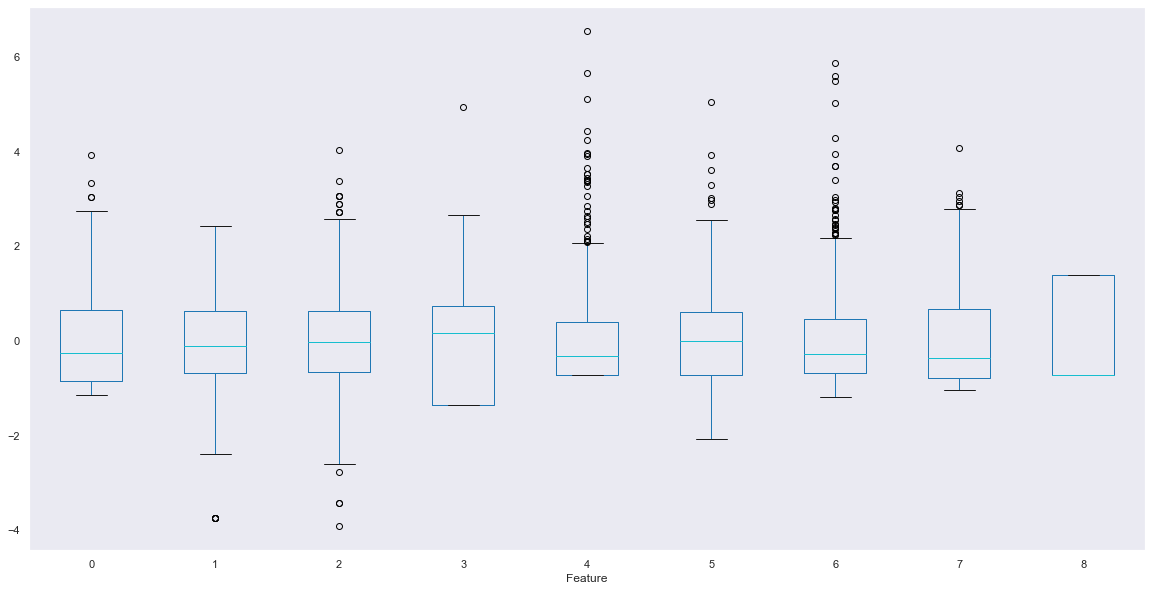

In [140]:
df_scaled.plot(
        kind='box', 
        stacked=True, 
        colormap='tab10')

plt.xlabel("Feature")
plt.grid(False)
plt.show()

In [141]:
X_scaled = df_scaled.loc[:, df_scaled.columns != 8]

X_scaled = X_scaled.values
X_scaled.shape

y_scaled = df_scaled[8].values
y_scaled.shape



(729,)

In [142]:
X = df.loc[:, df.columns != 'Outcome']

X = X.values
X.shape

y = df['Outcome'].values
y.shape


(729,)

In [143]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [144]:
results_dict = {'precision': [], 'recall':[], 'f1':[], 'accuracy': [],'ROC':[]}

results_dict_scaled = {'precision': [], 'recall':[], 'f1':[], 'accuracy': [],'ROC':[]}


# SVM

In [145]:
def train_svm(X_train, y_train):
    c_values = [0.1, 1, 10, 100]
    kernels = ['linear', 'rbf', 'poly']
    degrees = [1,2,3,4,5]
    gammas = [1e-3, 1e-2, 1e-1, 1, 10]
    best = (0, None)
    for k in kernels:
        for c in c_values:
            if k == 'poly':
                for d in degrees:
                    clf = svm.SVC(kernel=k, C=c, degree=d) 
                    scores = cross_val_score(clf, X_train, y_train, cv=5)
                    print(f'k: {k} C: {c} degree: {d} score: {scores.mean()}')
                    
            elif k == 'rbf':
                for g in gammas:
                    clf = svm.SVC(kernel=k, C=c, gamma=g) 
                    scores = cross_val_score(clf, X_train, y_train, cv=5)
                    print(f'k: {k} C: {c} gamma: {g} score: {scores.mean()}')
                
            else:
                clf = svm.SVC(kernel=k, C=c) 
                scores = cross_val_score(clf, X_train, y_train, cv=5)
                print(f'k: {k} C: {c} score: {scores.mean()}')
            if scores.mean()>best[0]:
                best = (scores.mean(),clf)
    return best

In [146]:
best = train_svm(X_train, y_train)
clf = best[-1]

best

k: linear C: 0.1 score: 0.7547008547008547
k: linear C: 1 score: 0.7495726495726496
k: linear C: 10 score: 0.7546861184792218
k: linear C: 100 score: 0.7392867668729738
k: rbf C: 0.1 gamma: 0.001 score: 0.6655172413793103
k: rbf C: 0.1 gamma: 0.01 score: 0.6638078396699086
k: rbf C: 0.1 gamma: 0.1 score: 0.6638078396699086
k: rbf C: 0.1 gamma: 1 score: 0.6638078396699086
k: rbf C: 0.1 gamma: 10 score: 0.6638078396699086
k: rbf C: 1 gamma: 0.001 score: 0.7289566755083997
k: rbf C: 1 gamma: 0.01 score: 0.670674918950781
k: rbf C: 1 gamma: 0.1 score: 0.6638078396699086
k: rbf C: 1 gamma: 1 score: 0.6638078396699086
k: rbf C: 1 gamma: 10 score: 0.6638078396699086
k: rbf C: 10 gamma: 0.001 score: 0.7100943118184497
k: rbf C: 10 gamma: 0.01 score: 0.6620542292956086
k: rbf C: 10 gamma: 0.1 score: 0.6638078396699086
k: rbf C: 10 gamma: 1 score: 0.6638078396699086
k: rbf C: 10 gamma: 10 score: 0.6638078396699086
k: rbf C: 100 gamma: 0.001 score: 0.674064249926319
k: rbf C: 100 gamma: 0.01 scor

(0.7547008547008547, SVC(C=0.1, kernel='linear'))

In [147]:
best_scaled = train_svm(X_train_scaled, y_train_scaled)
clf_scaled = best_scaled[-1]

best_scaled

k: linear C: 0.1 score: 0.7547303271441204
k: linear C: 1 score: 0.7512673150604184
k: linear C: 10 score: 0.7495431771293839
k: linear C: 100 score: 0.7495431771293839
k: rbf C: 0.1 gamma: 0.001 score: 0.6638078396699086
k: rbf C: 0.1 gamma: 0.01 score: 0.6638078396699086
k: rbf C: 0.1 gamma: 0.1 score: 0.6809018567639257
k: rbf C: 0.1 gamma: 1 score: 0.6638078396699086
k: rbf C: 0.1 gamma: 10 score: 0.6638078396699086
k: rbf C: 1 gamma: 0.001 score: 0.6638078396699086
k: rbf C: 1 gamma: 0.01 score: 0.7564544650751547
k: rbf C: 1 gamma: 0.1 score: 0.7478927203065134
k: rbf C: 1 gamma: 1 score: 0.6792071912761568
k: rbf C: 1 gamma: 10 score: 0.6638078396699086
k: rbf C: 10 gamma: 0.001 score: 0.7547450633657531
k: rbf C: 10 gamma: 0.01 score: 0.7633362805776599
k: rbf C: 10 gamma: 0.1 score: 0.7358679634541704
k: rbf C: 10 gamma: 1 score: 0.6775125257883878
k: rbf C: 10 gamma: 10 score: 0.6638078396699086
k: rbf C: 100 gamma: 0.001 score: 0.7581491305629237
k: rbf C: 100 gamma: 0.01 sc

(0.7547303271441204, SVC(C=0.1, kernel='linear'))

Text(0.5, 1.0, 'SVM standardized')

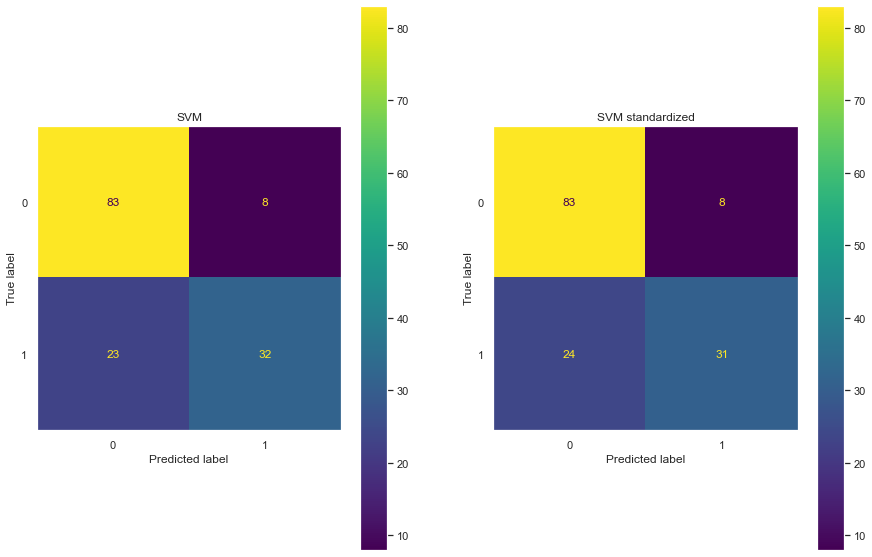

In [148]:
#svm test
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#scaled svm test
clf_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = clf_scaled.predict(X_test_scaled)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

fig1 = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axes.flatten()[0]) 
axes.flatten()[0].grid(False)
fig1.ax_.set_title('SVM')

ConfusionMatrixDisplay.from_estimator(clf_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[1]) 
plt.grid(False)
plt.title('SVM standardized')



<ipython-input-149-50f468d9610a>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


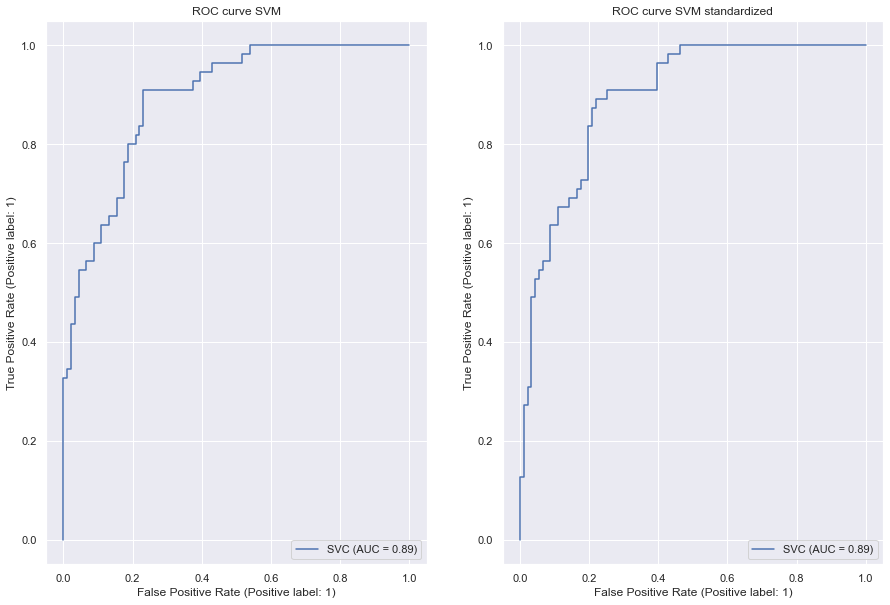

In [149]:
from sklearn.metrics import RocCurveDisplay


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

fig1 = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axes.flatten()[0])
fig.show()
fig1.ax_.set_title('ROC curve SVM')

RocCurveDisplay.from_estimator(clf_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[1])
plt.title('ROC curve SVM standardized')
plt.show()



In [150]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.decision_function(X_test))

results_dict['precision'].append(metrics.precision_score(y_test,y_pred))
results_dict['recall'].append(metrics.recall_score(y_test,y_pred))
results_dict['f1'].append(metrics.f1_score(y_test,y_pred))
results_dict['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
results_dict['ROC'].append(roc_auc_score(y_test, clf.decision_function(X_test)))


results_dict_scaled['precision'].append(metrics.precision_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['recall'].append(metrics.recall_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['f1'].append(metrics.f1_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['accuracy'].append(metrics.accuracy_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['ROC'].append(roc_auc_score(y_test_scaled, clf_scaled.decision_function(X_test_scaled)))



In [151]:
print('SVM')
for k,v in results_dict.items():
    print(f'{k} : {v[0]}')

print()
print('SVM standardized')
for k,v in results_dict_scaled.items():
    print(f'{k} : {v[0]}')

SVM
precision : 0.8
recall : 0.5818181818181818
f1 : 0.6736842105263158
accuracy : 0.7876712328767124
ROC : 0.8921078921078921

SVM standardized
precision : 0.7948717948717948
recall : 0.5636363636363636
f1 : 0.6595744680851063
accuracy : 0.7808219178082192
ROC : 0.8931068931068931


# Decision Tree

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

tree_scaled = DecisionTreeClassifier(random_state=0)
tree_scaled.fit(X_train_scaled,y_train_scaled)

y_pred_scaled = tree_scaled.predict(X_test_scaled)
                            

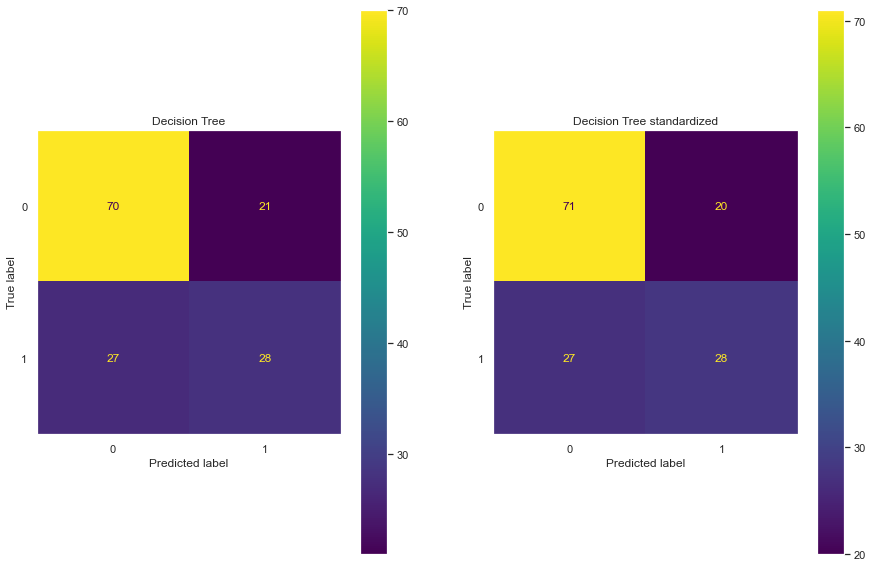

In [153]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

fig1 = ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, ax=axes.flatten()[0]) 
axes.flatten()[0].grid(False)
fig1.ax_.set_title('Decision Tree')

ConfusionMatrixDisplay.from_estimator(tree_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[1])
plt.title('Decision Tree standardized')
plt.grid(False)

<ipython-input-154-26c4acd3e86e>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


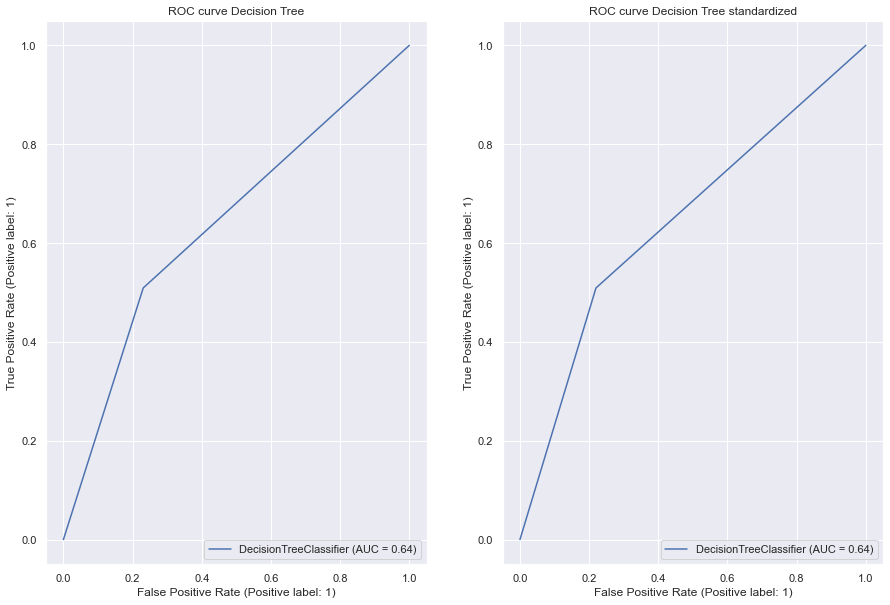

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

fig1 = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=axes.flatten()[0])
fig1.ax_.set_title('ROC curve Decision Tree')
fig.show()

RocCurveDisplay.from_estimator(tree_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[1])
plt.title('ROC curve Decision Tree standardized')
plt.show()

In [155]:
results_dict['precision'].append(metrics.precision_score(y_test,y_pred))
results_dict['recall'].append(metrics.recall_score(y_test,y_pred))
results_dict['f1'].append(metrics.f1_score(y_test,y_pred))
results_dict['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
results_dict['ROC'].append(roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))


results_dict_scaled['precision'].append(metrics.precision_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['recall'].append(metrics.recall_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['f1'].append(metrics.f1_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['accuracy'].append(metrics.accuracy_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['ROC'].append(roc_auc_score(y_test_scaled, tree_scaled.predict_proba(X_test_scaled)[:,1]))


In [156]:
print('Decision Tree')
for k,v in results_dict.items():
    print(f'{k} : {v[1]}')

print()
print('Decision Tree standardized')
for k,v in results_dict_scaled.items():
    print(f'{k} : {v[1]}')

Decision Tree
precision : 0.5714285714285714
recall : 0.509090909090909
f1 : 0.5384615384615383
accuracy : 0.6712328767123288
ROC : 0.639160839160839

Decision Tree standardized
precision : 0.5833333333333334
recall : 0.509090909090909
f1 : 0.5436893203883495
accuracy : 0.678082191780822
ROC : 0.6446553446553446


# Naive Bayes

In [157]:
from sklearn.naive_bayes import GaussianNB
bb = GaussianNB()
bb.fit(X_train, y_train)

y_pred = bb.predict(X_test)
bb_scaled = GaussianNB()
bb_scaled.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = bb_scaled.predict(X_test_scaled)


Text(0.5, 1.0, 'Naive Bayes standardized')

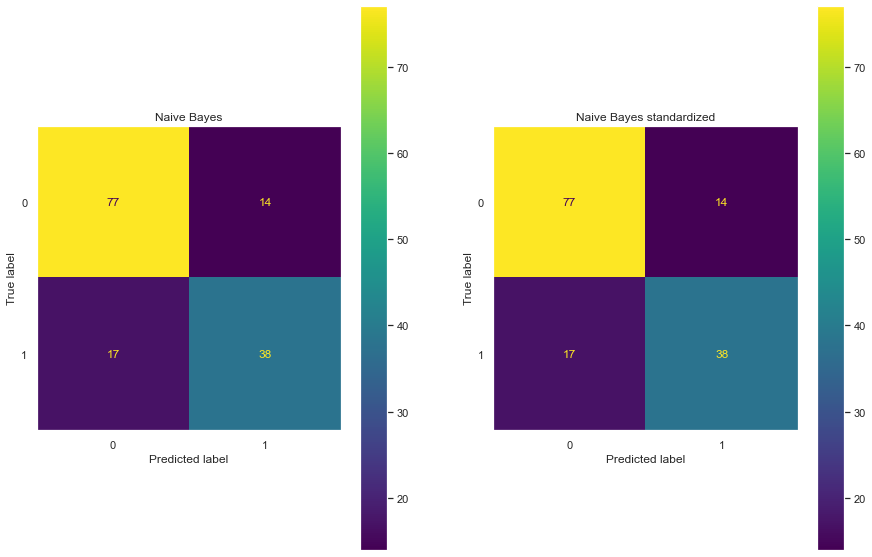

In [158]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

fig1 = ConfusionMatrixDisplay.from_estimator(bb, X_test, y_test, ax=axes.flatten()[0]) 
axes.flatten()[0].grid(False)
fig1.ax_.set_title('Naive Bayes')

ConfusionMatrixDisplay.from_estimator(bb_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[1]) 
plt.grid(False)
plt.title('Naive Bayes standardized')

<ipython-input-159-8e8252c624c7>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


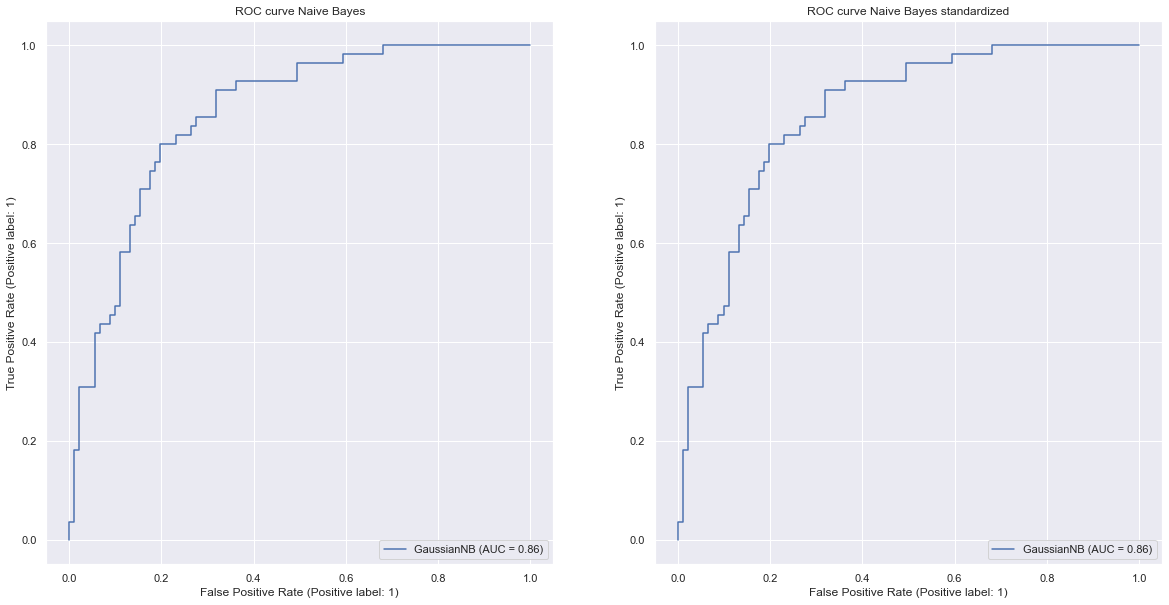

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax.set_title('ROC curve Naive Bayes')
fig1 = RocCurveDisplay.from_estimator(bb, X_test, y_test, ax=axes[0])
fig1.ax_.set_title('ROC curve Naive Bayes')
fig.show()

RocCurveDisplay.from_estimator(bb_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[1])
plt.title('ROC curve Naive Bayes standardized')
plt.show()

In [160]:

results_dict['precision'].append(metrics.precision_score(y_test,y_pred))
results_dict['recall'].append(metrics.recall_score(y_test,y_pred))
results_dict['f1'].append(metrics.f1_score(y_test,y_pred))
results_dict['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
results_dict['ROC'].append(roc_auc_score(y_test, bb.predict_proba(X_test)[:,1]))


results_dict_scaled['precision'].append(metrics.precision_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['recall'].append(metrics.recall_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['f1'].append(metrics.f1_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['accuracy'].append(metrics.accuracy_score(y_test_scaled,y_pred_scaled))
results_dict_scaled['ROC'].append(roc_auc_score(y_test_scaled, bb_scaled.predict_proba(X_test_scaled)[:,1]))

In [161]:
print('Naive Bayes')
for k,v in results_dict.items():
    print(f'{k} : {v[2]}')

print()
print('Naive Bayes standardized')
for k,v in results_dict_scaled.items():
    print(f'{k} : {v[2]}')

Naive Bayes
precision : 0.7307692307692307
recall : 0.6909090909090909
f1 : 0.7102803738317757
accuracy : 0.7876712328767124
ROC : 0.8587412587412587

Naive Bayes standardized
precision : 0.7307692307692307
recall : 0.6909090909090909
f1 : 0.7102803738317757
accuracy : 0.7876712328767124
ROC : 0.8587412587412587


# Conclusion

Text(0.5, 1.0, 'Naive Bayes standardized')

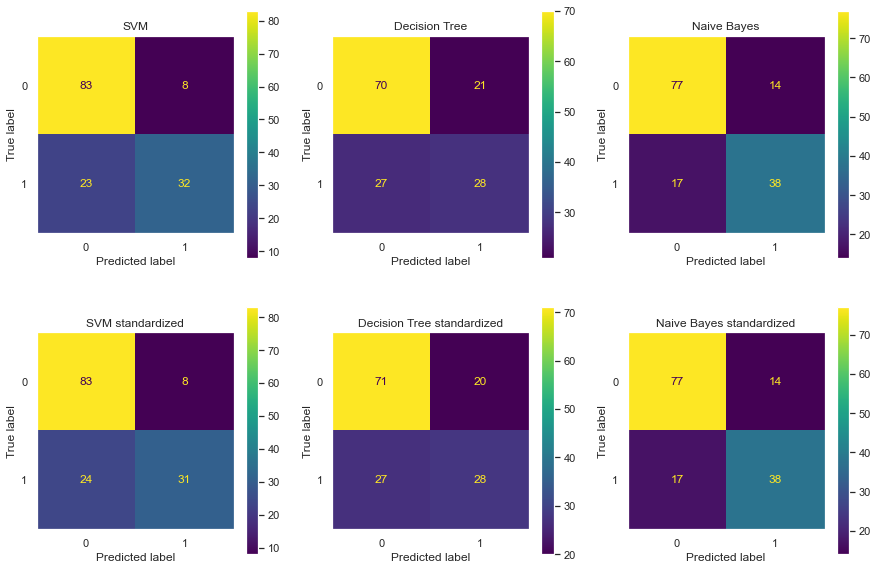

In [162]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

fig1 = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axes.flatten()[0])
axes.flatten()[0].grid(False)
fig1.ax_.set_title('SVM')

fig1 = ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, ax=axes.flatten()[1]) 
axes.flatten()[1].grid(False)
fig1.ax_.set_title('Decision Tree')

fig1 = ConfusionMatrixDisplay.from_estimator(bb, X_test, y_test, ax=axes.flatten()[2]) 
axes.flatten()[2].grid(False)
fig1.ax_.set_title('Naive Bayes')

fig1 = ConfusionMatrixDisplay.from_estimator(clf_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[3])
axes.flatten()[3].grid(False)
fig1.ax_.set_title('SVM standardized')

fig1 = ConfusionMatrixDisplay.from_estimator(tree_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[4])
axes.flatten()[4].grid(False)
fig1.ax_.set_title('Decision Tree standardized')

fig1 = ConfusionMatrixDisplay.from_estimator(bb_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[5]) 
plt.grid(False)
fig1.ax_.set_title('Naive Bayes standardized')

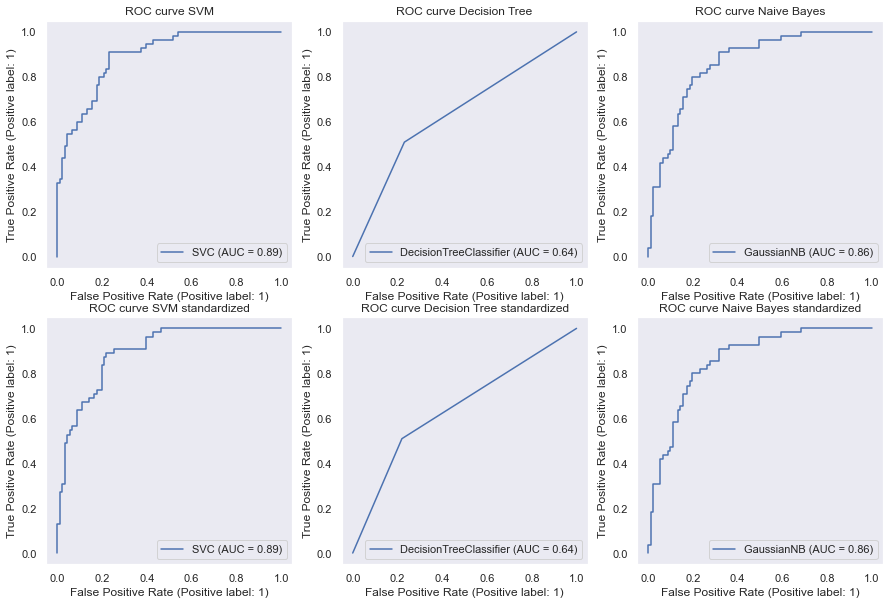

In [163]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

fig1 = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axes.flatten()[0]) 
axes.flatten()[0].grid(False)
fig1.ax_.set_title('ROC curve SVM')

fig1 = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=axes.flatten()[1]) 
axes.flatten()[1].grid(False)
fig1.ax_.set_title('ROC curve Decision Tree')

fig1 = RocCurveDisplay.from_estimator(bb, X_test, y_test, ax=axes.flatten()[2]) 
axes.flatten()[2].grid(False)
fig1.ax_.set_title('ROC curve Naive Bayes')

fig1 = RocCurveDisplay.from_estimator(clf_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[3])
axes.flatten()[3].grid(False)
fig1.ax_.set_title('ROC curve SVM standardized')

fig1 = RocCurveDisplay.from_estimator(tree_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[4])
fig1.ax_.set_title('ROC curve Decision Tree standardized')
axes.flatten()[4].grid(False)

fig1 = RocCurveDisplay.from_estimator(bb_scaled, X_test_scaled, y_test_scaled, ax=axes.flatten()[5]) 
fig1.ax_.set_title('ROC curve Naive Bayes standardized')
plt.grid(False)

In [164]:

roc_auc_score(y_test, clf.decision_function(X_test))

models = [bb, clf, tree]

models = [bb_scaled, clf_scaled, tree_scaled]

results = pd.DataFrame(results_dict, index =['SVM', 'Decision Tree', 'Naive Bayes'])

print('Raw data')
results

Raw data


,precision,recall,f1,accuracy,ROC
SVM,0.800000,0.581818,0.673684,0.787671,0.892108
Decision Tree,0.571429,0.509091,0.538462,0.671233,0.639161
Naive Bayes,0.730769,0.690909,0.710280,0.787671,0.858741


In [165]:
results_scaled = pd.DataFrame(results_dict_scaled, index =['SVM', 'Decision Tree', 'Naive Bayes'])

print('Standardized data')
results_scaled

Standardized data


,precision,recall,f1,accuracy,ROC
SVM,0.794872,0.563636,0.659574,0.780822,0.893107
Decision Tree,0.583333,0.509091,0.543689,0.678082,0.644655
Naive Bayes,0.730769,0.690909,0.710280,0.787671,0.858741


# Odgovori

#### Svrha: 

Primijenjeno istraživanje jer se pokušava predvidjeti pojava dijabetesa, odnosno riješiti stvaran problem. Stvara se praktično znanje.

#### Izvor informacija:

Primarno istraživanje jer su podaci prikupljeni izravno testiranjem populacije.

#### Vrijeme provedbe:

Studija presjeka jer se uzeo presjek populacije u određenom vremenu. Iako studija traje više godina, u datasetu se nalazi presjek određenog trenutka u vremenu.

#### Način prikupljanja podataka:

Laboratorijsko istraživanje jer su se podaci skupljali u kontroliranom okruženju, odnosno testiranjem populacije u bolnici i to specijalnim oralnim testovima tolerancije na glukozu.

#### Vrsta korištenih podataka:

Kvantitativno istraživanje jer se koriste mjerljive varijable (sve varijable opisane brojevima). Gledamo korelaciju između varijabli i dijabetesa.

#### Stupanj manipulacije varijablama:

Promatračko istraživanje jer istraživači nisu intervenirali izravno, samo su mjerili varijable kod određene populacije.

#### Dubina zaključka:

Objašnjavačko istraživanje jer gledamo uzročno-posljedične veze između značajki (broj trudnoća, BMI, inzulin, godine) i pojave dijabetesa.

#### Vrsta zaključka:

Hipotetičko-deduktivno istraživanje jer promatramo stvarnost, odnosno godine, BMI, inzulin itd. kod ljudi te pomoću dedukcije donosimo zaključak ima li osoba dijabetes te onda provjeravamo to medicinskim testiranjem.

##  Metode kako su podaci za članak prikupljeni

Dokumentarno istraživanje s ograničenim pristupom (medicinski podaci). Podaci su prikupljani od strane Nacionalnog insituta za dijabetes (autentičnost), probavne i bolesti jetre. Svi stanovnici zajednice prošli su oralni test tolerancije na glukozu, dijabetes je bio dijagnosticiran prema kriteriju WHO-a (kredibilitet).

##  Pravila istraživačke etike

- nitko nije pretrpio štetu kao rezultat sudjelovanja u istraživanju
- rezultati nisu namješteni
- sudionici su zaštićeni od fizičkih ili psihičkih ozljeda - test je dijagnosticiran prema kriteriju WHO-a
- sudionici su ostali anonimni
- podaci su javno dostupni, ali i dalje je sačuvana anonimnost sudionika
- sve članove zajednice preko 5 godina starosti pitalo se da prođu standardizirano testiranje svake 2 godine - dobrovoljni pristanak sudionika
- radi se o standardiziranom testu, stoga su sudionici bili upoznati sa svrhom, trajanjem i učincima testiranja

Pravila istraživačke etike su poštovana.


